# AQI Analysis of Alberta Monitoring Stations
## Data Preparation for Analysis

My data preparation process is designed to consolidate air quality data from multiple cities into a unified DataFrame that facilitates comprehensive analysis and visualization. The process is structured into distinct steps:

#### 1. Loading and Labeling Data
For each city's dataset, I:

- Load the data from CSV files.
- Add a "city" column to label each record with its corresponding city. This step is crucial for distinguishing observations from different cities in the combined dataset.

#### 2. Combining Datasets
I merge the individually labeled city datasets into a single DataFrame. This allows for analysis to be performed on on unified dataframe across all cities without handling each city's data separately.

#### 3. Transforming Data for Analysis
To prepare the data for insightful analysis, we perform several transformations:

- Convert "date" columns to Python datetime objects, allowing for time-series analyses.
- Extract "year" and "month" from the date, creating separate columns for each. This facilitates analyses that examine trends over years or within specific months.
- Categorize PM2.5 levels into binary classes ("1" for above-average levels and "0" for below-average levels) based on a threshold value. This classification is used in analyses focusing on air quality levels relative to a predefined benchmark.
- Group months into pairs (e.g., "Jan-Feb", "Mar-Apr") to analyze data in bimonthly periods. This aggregation helps in identifying seasonal trends in air quality.

#### 4. Implementation Details
- Define dictionaries mapping the original dataset file paths to their corresponding city names. This approach streamlines the loading and labeling process.
- Utilizing list comprehensions and Pandas functions (pd.read_csv, pd.concat), to efficiently load, label, and combine the city datasets.
- The transform_data function performs custom transformations, including datetime conversion, PM2.5 classification, and month pairing, to allow for more versatile visualizations.

This systematic preparation of air quality data lays the groundwork for my subsequent exploratory data analysis (EDA) and visualization efforts, ensuring that my findings are based on well-structured and accurately represented data.

In [1]:
# For Exporting Plotly Graphs in notebook
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


## Data Analysis

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

# Data loading and adding city column
def load_and_label_city(file_path, city_name):
    df = pd.read_csv(file_path)
    df["city"] = city_name
    return df

# Combine all city dataframes into one
def combine_cities(city_dfs):
    return pd.concat(city_dfs)

# Perform transformations for analysis
def transform_data(df):
    df["date"] = pd.to_datetime(df["date"])
    df["year_only"] = df["date"].dt.year
    df["month_only"] = df["date"].dt.month
    df["pm25_class"] = np.where(df["pm25"] >= 29, 1, 0)

    # Define month pairs
    month_pairs = {
        (1, 2): 'Jan-Feb',
        (3, 4): 'Mar-Apr',
        (5, 6): 'May-Jun',
        (7, 8): 'Jul-Aug',
        (9, 10): 'Sep-Oct',
        (11, 12): 'Nov-Dec'
    }
    
    # Map each month to its corresponding pair
    df['month_pair'] = df['month_only'].apply(lambda x: next(month_pair for months, month_pair in month_pairs.items() if x in months))

    return df

# Load the data for all cities
city_files = {
    "Data/cleaned_cgy_df.csv": "Calgary",
    "Data/cleaned_leth_df.csv": "Lethbridge",
    "Data/cleaned_fort_df.csv": "Fort McMurray",
    "Data/cleaned_edm_df.csv": "Edmonton"
}

city_dfs = [load_and_label_city(file, city) for file, city in city_files.items()]

# Combine and transform
cities_df = combine_cities(city_dfs)
cities_df = transform_data(cities_df)

# Now cities_df is ready to be used for analysis and plotting.


*There are some warnings that appear in the notebook, related to certain visualization packages. The code below is to try and suppress the warnings.*

In [3]:
# suppressing some warnings that appeared in notebook
import warnings

warnings.filterwarnings("ignore", message="The default of observed=False is deprecated")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Cities Dataframe Overview

After running the preparation and transformation steps, we will sample 20 rows of data from the cities_df. The cities_df is what we will be working with for the remainder of the notebook.

### Dataframe Sample

In [4]:
cities_df.sample(20)

,date,pm25,city,year_only,month_only,pm25_class,month_pair
2666,2016-08-09,19.0,Lethbridge,2016,8,0,Jul-Aug
325,2023-06-23,12.0,Lethbridge,2023,6,0,May-Jun
1674,2016-05-05,48.0,Edmonton,2016,5,1,May-Jun
1351,2017-06-07,23.0,Edmonton,2017,6,0,May-Jun
912,2021-07-30,120.0,Calgary,2021,7,1,Jul-Aug
2295,2017-07-23,24.0,Lethbridge,2017,7,0,Jul-Aug
2944,2014-09-02,19.0,Calgary,2014,9,0,Sep-Oct
1957,2018-09-04,34.0,Calgary,2018,9,1,Sep-Oct
1999,2018-08-25,17.0,Fort McMurray,2018,8,0,Jul-Aug
2662,2016-09-24,39.0,Fort McMurray,2016,9,1,Sep-Oct


### Dataframe Description

In [5]:
cities_df.describe()

,date,pm25,year_only,month_only,pm25_class
count,11947,11947.000000,11947.000000,11947.000000,11947.000000
mean,2019-03-16 11:25:35.280823552,28.980413,2018.699171,6.591697,0.369298
min,2014-07-29 00:00:00,1.000000,2014.000000,1.000000,0.000000
25%,2016-10-04 00:00:00,15.000000,2016.000000,4.000000,0.000000
50%,2019-03-24 00:00:00,23.000000,2019.000000,7.000000,0.000000
75%,2021-06-11 12:00:00,35.000000,2021.000000,10.000000,1.000000
max,2024-03-03 00:00:00,673.000000,2024.000000,12.000000,1.000000
std,NaN,25.799935,2.763258,3.489170,0.482635


### Dataframe Datatypes

In [6]:
cities_df.dtypes

date          datetime64[ns]
pm25                 float64
city                  object
year_only              int32
month_only             int32
pm25_class             int64
month_pair            object
dtype: object

### PM2.5 Class Distribution by City
The distribution of PM2.5 classes across different cities.

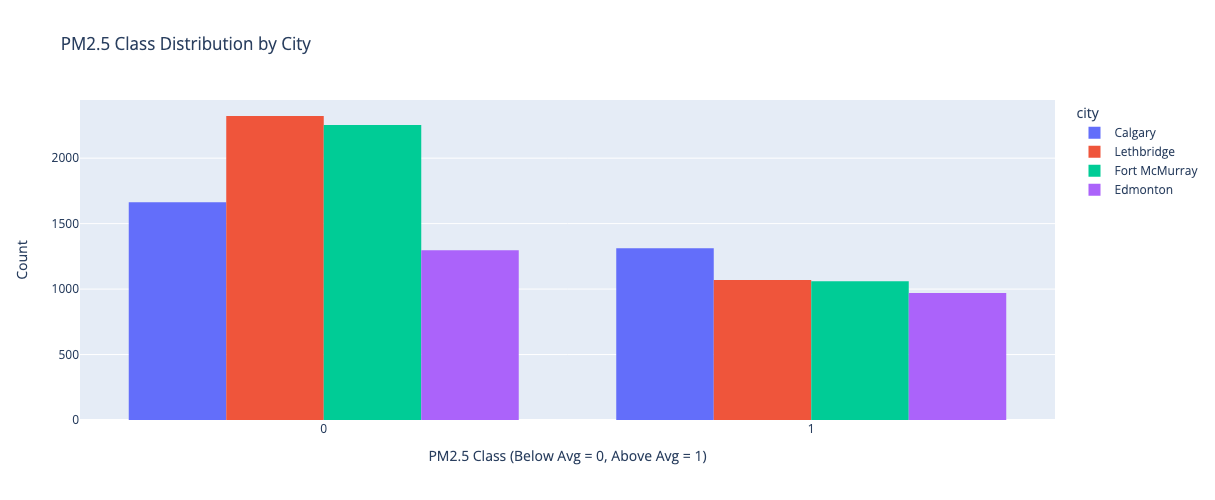

In [7]:
fig = px.histogram(cities_df, x='pm25_class', color='city', barmode='group', 
                   category_orders={"pm25_class": sorted(cities_df['pm25_class'].unique())},
                   title='PM2.5 Class Distribution by City',
                   width=700,
                  height=500)
fig.update_xaxes(categoryorder='category ascending', title_text='PM2.5 Class (Below Avg = 0, Above Avg = 1)')
fig.update_yaxes(title_text='Count')
fig.show()


**PM2.5 Class Distribution by City:**
   - Calgary has a notably high count of days with below-average PM2.5 levels, which could reflect generally better air quality in that city.
   - Fort McMurray shows a higher count of days with above-average PM2.5 levels compared to other cities, which might point to more frequent air quality concerns or events that raise PM2.5 levels in that region.

### Monthly PM2.5 Variations
PM2.5 measurements across different months

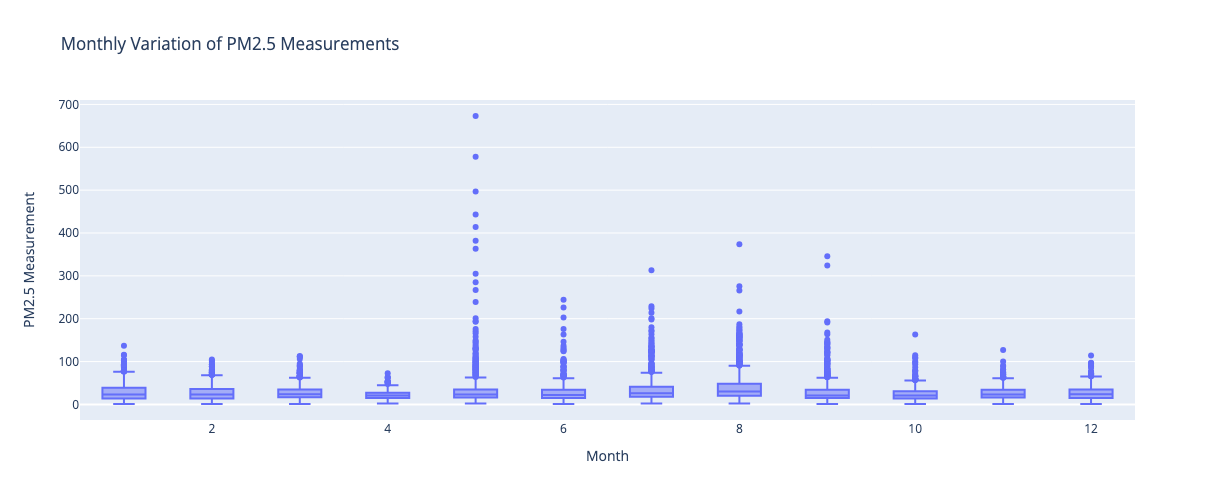

In [8]:
fig = px.box(cities_df, x='month_only', y='pm25', title='Monthly Variation of PM2.5 Measurements', width=600, height=500, 
             category_orders={"month_only": sorted(cities_df['month_only'].unique(), key=int)})
fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='PM2.5 Measurement')
fig.show()

**Monthly Variation of PM2.5 Measurements:**
   - The spread of PM2.5 readings varies by month, with some months exhibiting a greater range of measurements, indicating that certain times of the year may be more prone to air quality fluctuations.
   - Outliers are present in every month, with some months showing extreme PM2.5 values, suggesting occasional events that significantly impact air quality.

### PM2.5 Distributions

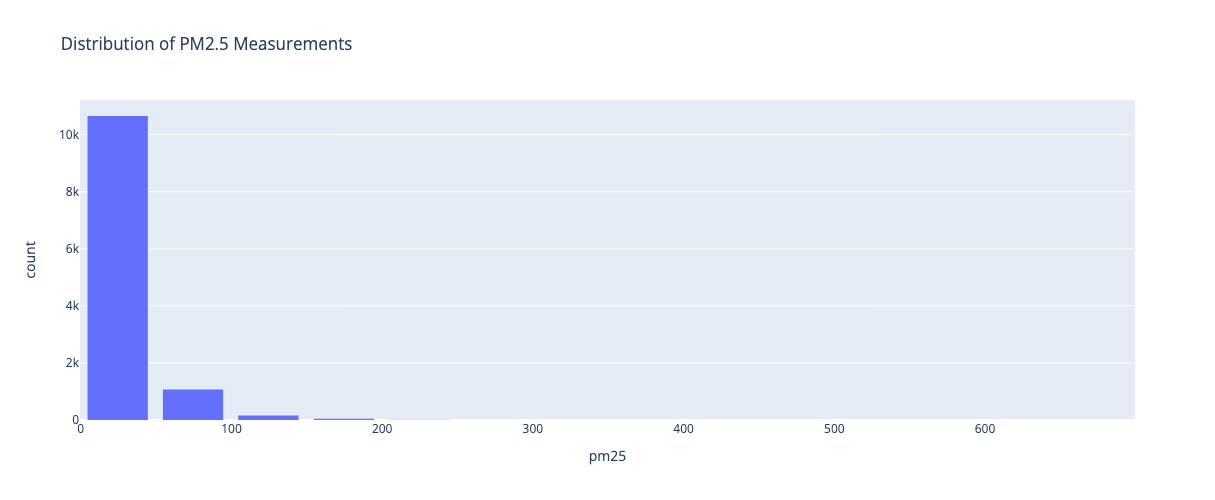

In [9]:
fig = px.histogram(cities_df, x='pm25', nbins=30, title='Distribution of PM2.5 Measurements', width=600,height=500)
fig.update_layout(bargap=0.2)
fig.show()

**Distribution of PM2.5 Measurements:**
   - The distribution of PM2.5 measurements is heavily skewed towards lower values, indicating that on most days, the PM2.5 levels are relatively low.
   - Very high PM2.5 readings are relatively rare, occurring as outliers in the distribution, which suggests infrequent but significant air pollution incidents.

## Analysis & Visualizations

### Key Questions

- How have the PM2.5 Levels changed since 2014 in each city?
- What are the average PM2.5 levels across each city (monitoring station)?
- What is the frequency of PM2.5 levels detected in each city that are above the average (pm25 mean = 28.980413)?
- What months, and cities, tend to have above average PM2.5 levels?
- What is the longest duration of above average PM2.5 levels for each monitoring station?
- What periods in the year do above average PM2.5 occur the most? 

### Exploring the Data

### How have the PM2.5 Levels changed since 2014 in each city?


#### Plot, Overlay

In [10]:
# Defining Labels for the plots below:
labels={'pm25': 'PM2.5 Level', 'month_pair': 'Bi-monthly Period', 'city': 'Monitoring Station', "year_only":"Year", "date":"Date"}

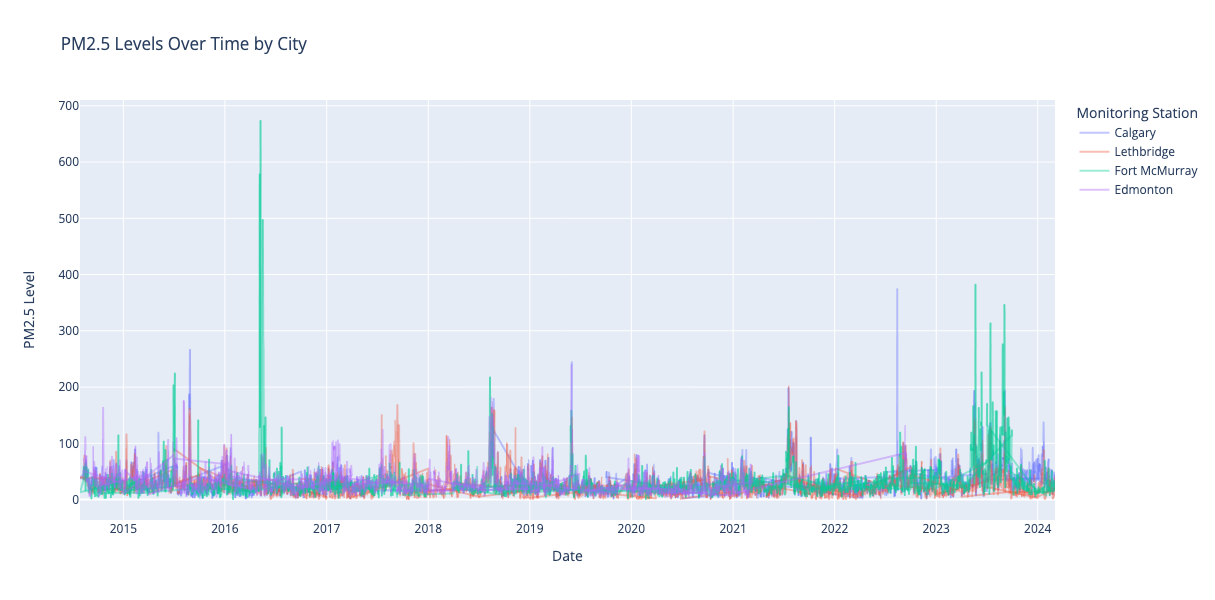

In [11]:
fig = px.line(cities_df, x='date', y='pm25', color='city', title='PM2.5 Levels Over Time by City', height=600, width=900, labels=labels)
fig.update_traces(opacity=0.39)
fig.show()


#### Insight
This plot tracks the PM2.5 levels recorded over several years across four cities. 

The notable green spike in Fort McMurray in 2016 is indicative of a significant pollution event, specifically identified as a massive wildfire. Other than such outliers, PM2.5 levels show variability but no sustained upward or downward trend is immediately apparent from this visualization.

#### Plot, Faceted by City

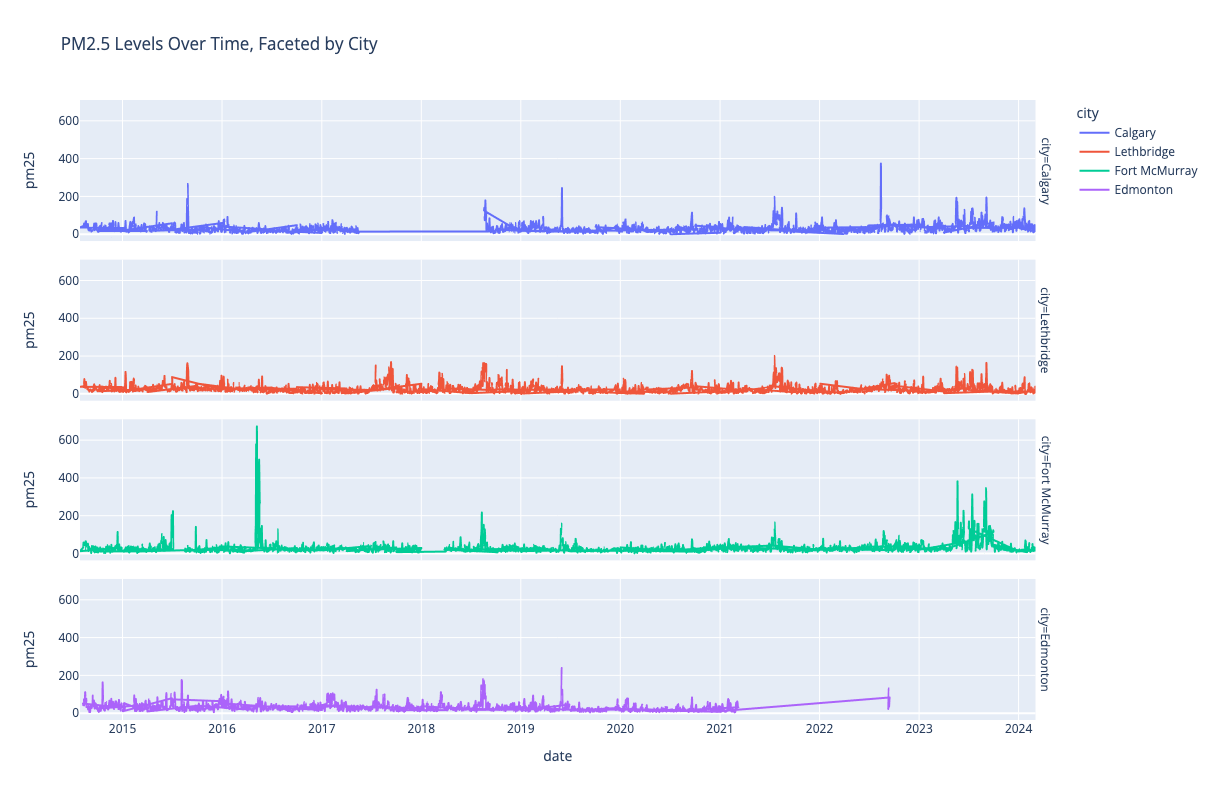

In [12]:
# Plotting PM2.5 levels over time for each city using Plotly
fig = px.line(
    cities_df,
    x="date",
    y="pm25",
    color="city",
    title="PM2.5 Levels Over Time, Faceted by City",
    facet_row="city",
    height=800,
    width=900,
)

layout = fig.layout

fig.show()


#### Insights

This collection of line plots provides a city-wise comparison of PM2.5 levels over time. Each city's data is presented in a separate plot to allow for an easier comparison of trends within each city without the overlap of data points.

*Interesting Notes:*

- Zooming in on the Faceted graph (above) so the pm25 level in the frame peaks at ~200, the Calgary and Lethbridge stations appear to follow very similar levels or slightly offset (indicating how long it took the source of the decreased air quality to reach another monitoring station).

- From 2018 and onwards, Edmonton and Fort McMurray also follow a similar AQI reading, up to the point where the Edmonton data showed a gap in collection. Although the datapoint collected on September 12, 2022 for Edmonton is very similar in pm25 to the Fort McMurray pm25 value collected on August 24, 2022. 

### What are the average PM2.5 levels across each city (monitoring station)?


#### Plot

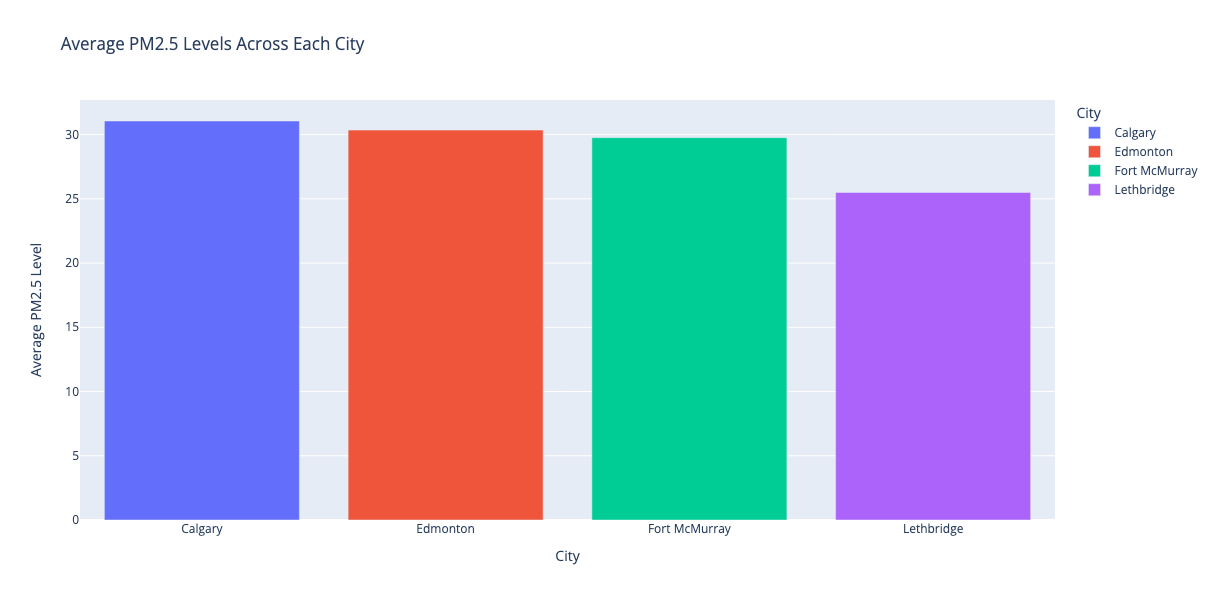

In [13]:
# Calculate the average PM2.5 levels for each city
avg_pm25_by_city = cities_df.groupby('city')['pm25'].mean().reset_index()

# Sort in descending order of pm25
avg_pm25_by_city_desc = avg_pm25_by_city.sort_values(by='pm25', ascending=False)

# Bar chart to visualize the average PM2.5 levels across each city
fig = px.bar(avg_pm25_by_city_desc, 
             x='city', 
             y='pm25', 
             title='Average PM2.5 Levels Across Each City',
             labels={'pm25': 'Average PM2.5 Level', 'city': 'City'},
             color='city',
             barmode="relative",
             width=800,
             height=600
            )

fig.show()


#### Insights

This bar chart compares the average PM2.5 levels among the cities. 
- Calgary and Edmonton have higher average PM2.5 levels than Fort McMurray and Lethbridge.

The Average PM2.5 levels across each monitoring station could be attributed to many factors. 

1. **Urban Traffic and Industrial Emissions:**
    - Larger cities with dense traffic and more industrial activities tend to have higher levels of air pollutants, including PM2.5. 
    - Vehicle emissions are a significant source of particulate matter, especially in urban centers with heavy traffic.
    - Industrial processes can also contribute to higher PM2.5 levels.

2. **Geographical and Meteorological Conditions:** 
    - The geographical location of a monitoring station and prevailing weather patterns, such as wind, can affect air pollution levels.
    - Forest Fires occuring in British Columbia or near the Rockies will likely travel over more central cities like Calgary and Edmonton, than the far north location of Fort McMurray or slightly southern Lethbridge
    - Wind patterns can also disperse or concentrate pollutants in specific areas.

3. **Heating and Energy Consumption:**
    - The demand for heating during the winter, or cooling during summer, can contribute to increased PM2.5 levels.

4. **Construction and Road Dust:**
    - Construction activities and road dust can be significant sources of particulate matter in urban areas.
    - Larger cities with ongoing development projects may have higher levels of PM2.5 due to these sources.


### What is the frequency of PM2.5 levels detected in each city that are above the average?
*The average used to differentiate between above and below pm25 value was 29. Above Average = 1*

#### Plot

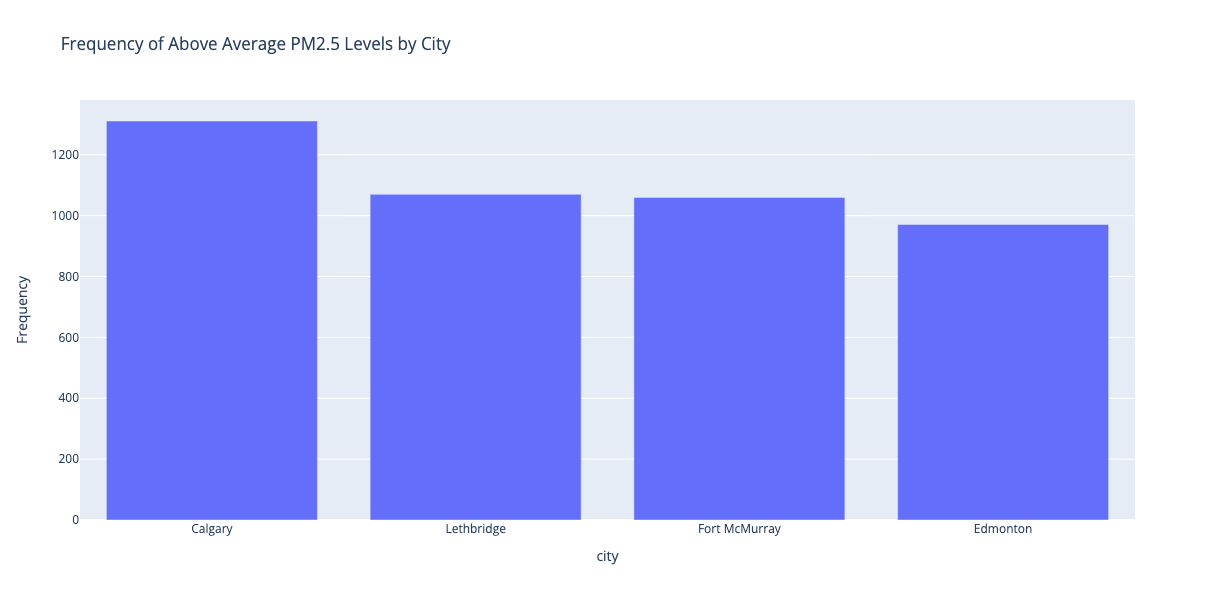

In [14]:
# Calculate the frequency of above average PM2.5 levels (pm25_class = 1) for each city.
freq_above_avg = cities_df[cities_df['pm25_class'] == 1].groupby('city').size()
freq_above_avg_desc = freq_above_avg.sort_values(ascending=False)

# Plot this frequency to visualize the comparison between cities.
fig = px.bar(
    freq_above_avg_desc, 
    x=freq_above_avg_desc.index,
    y=freq_above_avg_desc.values,
    title='Frequency of Above Average PM2.5 Levels by City',
    labels={'y':'Frequency', 'x':'City'},
    width=800,
    height=600
)

fig.show()

#### insights

This bar chart represents the frequency of days on which the PM2.5 levels were above average in each city. 
- The frequency of above-average PM2.5 level days from highest to lowest is:
    - Calgary (highest)
    - Lethbridge
    - Fort McMurray
    - Edmonton (lowest)

### What months, and cities, tend to have above average PM2.5 levels?

#### Plot

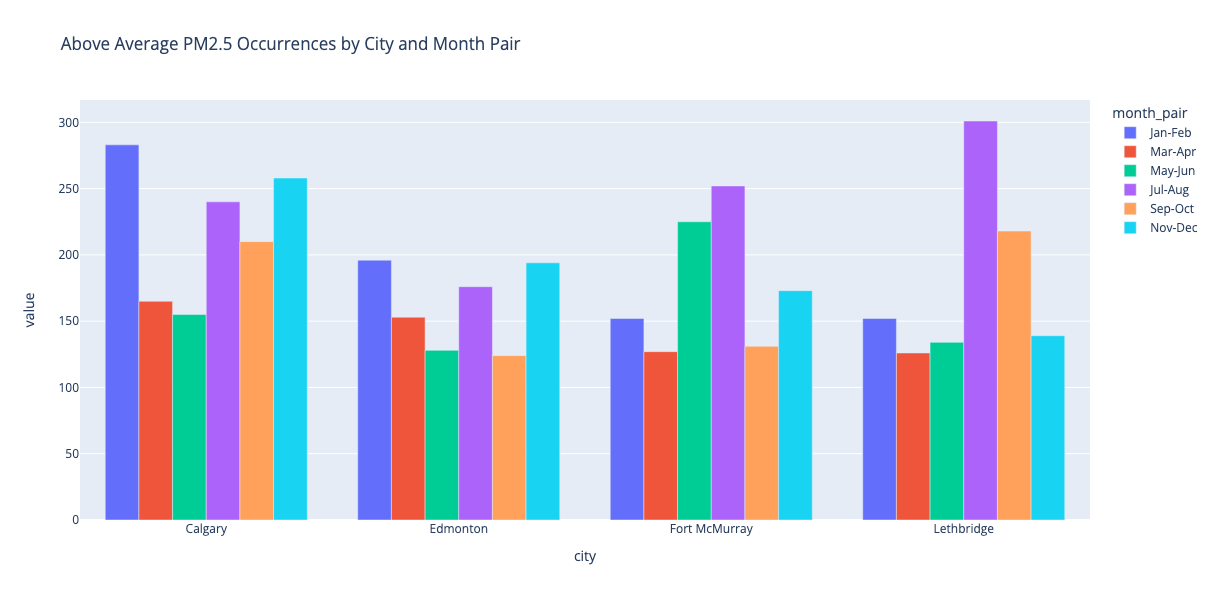

In [15]:
sorted_df = cities_df[cities_df['pm25_class'] == 1].sort_values(by=['month_pair'])

# Group and Pivot
monthly_city_above_avg = sorted_df.groupby(['city', 'month_pair']).size().unstack(fill_value=0)

# Plotting
fig = px.bar(
    monthly_city_above_avg,
    barmode='group',
    title='Above Average PM2.5 Occurrences by City and Month Pair',
    category_orders={
                "month_pair": ["Jan-Feb", "Mar-Apr", "May-Jun", "Jul-Aug", "Sep-Oct", "Nov-Dec"]
            },
    width=800,
    height=600
)
fig.show()


#### Insights

This bar chart indicates the count of above-average PM2.5 occurrences, broken down by city and by bimonthly periods. Some cities have higher occurrences in certain months, which could be attributed to seasonal factors or specific environmental events. 

Highest Number of Above Average Levels of PM2.5 Ranking:

    - Jan-Feb, Mar-Apr: Calgary
> Jan-Feb & Mar-Apr in Calgary: The winter and early spring months might see increased particulate matter due to factors like residential heating emissions, temperature inversions that trap pollutants near the ground, and less dispersion of pollutants due to stagnant air masses.

    - May-Jun: Fort McMurray
> May-Jun in Fort McMurray: The late spring and early summer period is often dry and can coincide with wildfire season, which may explain the spike in PM2.5 levels, especially given Fort McMurray's history with significant wildfires.

    - Jul-Aug: Lethbridge
> Jul-Aug in Lethbridge: This could be due to agricultural activities such as harvesting, which can kick up dust and particulate matter. Summer also brings the possibility of wildfires, which can significantly affect air quality.

    - Sep-Oct: Calgary & Lethbridge (Near Tie)
> A near tie in these months could be due to similar agricultural activities or weather patterns that affect these two cities similarly.
        *Edmonton and Fort McMurray are much lower, but also nearly tied*

    - Nov-Dec: Calgary

#### Other Contributing Factors:

1. **The specific location and topography of a city can influence air quality.**
- Cities in valleys or surrounded by mountains, for example, may experience more air pollution due to the trapping of air pollutants.

2. **Calgary's Higher Rankings**
- As a larger urban center with more industrial activities, vehicle traffic, and construction, Calgary could inherently have more sources of PM2.5 pollution, leading to more frequent above-average levels.

3. **Environmental Policies and Regulations**
- Variations in local environmental policies, industrial regulations, and emissions standards can impact the number of above-average PM2.5 occurrences.

4. **Populated Areas** 
- Calgary and Edmonton population could contribute to the overall PM2.5 values for each city for a variety of reasons that range from the need of heating in the cold winter months, air conditioning in hot months, the number of homes based on the population and the infrastructure required to provide utilities to the homes and businesses. The size of the city may also influence the daily commute for individuals travelling from one point to another.

5. **Events, Festivals and Travel**
Calgary and Edmonton both offer attractive summer activities and events throughout the summer months. From outdoor events like the Stampede, cultural and food-oriented festivals, and the ability to travel quickly to the Rocky Mountains in the summer months.

6. **Weather Related**
- Wildfire conditions in BC may cause PM25 levels to increase in Calgary and Lethbridge, dependant on the seasonal weather patterns.

#### Each of these factors can interact in complex ways to influence PM2.5 levels, and often a combination of several factors will be at play rather than a single one. Understanding these interactions can be critical for planning and implementing air quality management strategies.

### What periods in the year do above average PM2.5 occur the most?

#### Plot

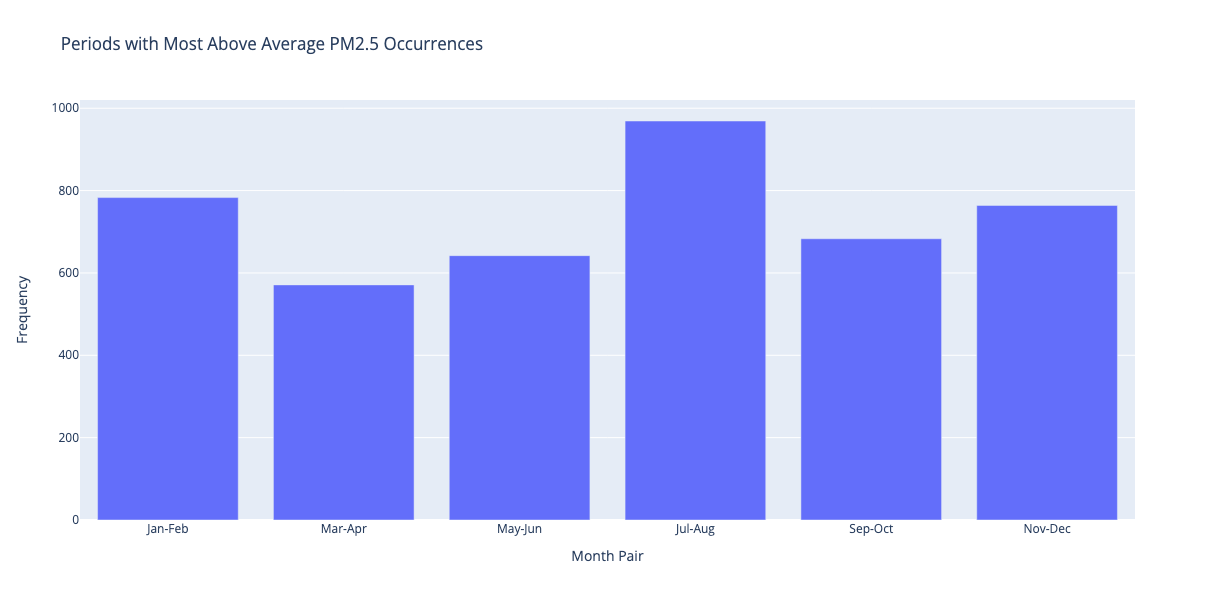

In [16]:
periods_above_avg = cities_df[cities_df['pm25_class'] == 1].groupby(['month_pair']).size()

# Plotting
fig = px.bar(
    periods_above_avg, 
    x=periods_above_avg.index, 
    y=periods_above_avg.values, 
    title='Periods with Most Above Average PM2.5 Occurrences', labels={'y':'Frequency', 'month_pair':'Month Pair'},
    width=800,
    height=600,
    category_orders={
                "month_pair": ["Jan-Feb", "Mar-Apr", "May-Jun", "Jul-Aug", "Sep-Oct", "Nov-Dec"]
            }
)
fig.show()

#### Insights

The total occurrences of above-average PM2.5 levels across all cities, grouped by bimonthly periods, is shown in the graph above.
It shows that some periods have a higher frequency of above-average readings, which might correlate with seasonal changes or events like wildfires that affect air quality.

##### Jul-Aug period registering the highest frequency of above-average PM2.5 occurrences could be influenced by several factors:

1. Wildfires:
    Summer months are typically wildfire season, especially in western regions like Alberta. Wildfires can significantly contribute to PM2.5 levels due to the large amounts of particulate matter released into the atmosphere.
2. Increased Energy Consumption:
    Air conditioning use peaks during these months, leading to increased energy demand and potentially higher emissions from power plants, especially if the energy mix includes fossil fuels.
3. Agricultural Activities:
    Harvesting and other agricultural activities can stir up dust and other particulates, contributing to higher PM2.5 levels in rural and surrounding areas.
---------

##### For Jan-Feb and Nov-Dec showing elevated PM2.5 levels:

1. Winter Heating:
The demand for heating is higher in these colder months, leading to increased combustion of heating fuels which can contribute to PM2.5 levels.

2. Temperature Inversions & Reduced Vertical Mixing:
- Cold weather can lead to temperature inversions, which trap pollutants close to the ground and prevent them from dispersing, thereby increasing PM2.5 concentrations.
- Colder temperatures often result in a more stable atmosphere with less vertical mixing, causing pollutants to accumulate near the surface.

3. Holiday Activities:
In Nov-Dec, there could be an increase in PM2.5 levels due to:
- The burning of wood in fireplaces,
- Increased vehicular traffic from holiday travel,
- Increased commercial activity leading up to the holidays.

**Each of these periods features specific environmental and human factors that can lead to higher PM2.5 readings, reflecting the complex interplay between human activities, seasonal cycles, and weather patterns.**

### What is the longest duration of above average PM2.5 levels for each monitoring station?

#### Function Overview

In [17]:
# To correctly identify consecutive periods where PM25 levels are above 1, 
# the dataframe needs to be sorted by city and date.
cities_df.sort_values(by=['city', 'date'], inplace=True)

# Filter for above-average PM2.5 levels
above_avg_df = cities_df[cities_df['pm25_class'] == 1]

# Define a function to calculate the longest streak of consecutive days
def longest_streak(ser):
    # Calculate differences between consecutive dates in days
    diff = ser.diff().dt.days
    
    # Identify where the streaks start (difference > 1 day)
    streak_starts = diff > 1
    
    # Cumulative sum to assign IDs to streaks
    streak_ids = streak_starts.cumsum()
    
    # Count occurrences of each streak ID to get streak lengths
    streak_lengths = streak_ids.value_counts()
    
    # Return the length of the longest streak
    return streak_lengths.max()

#### Plot

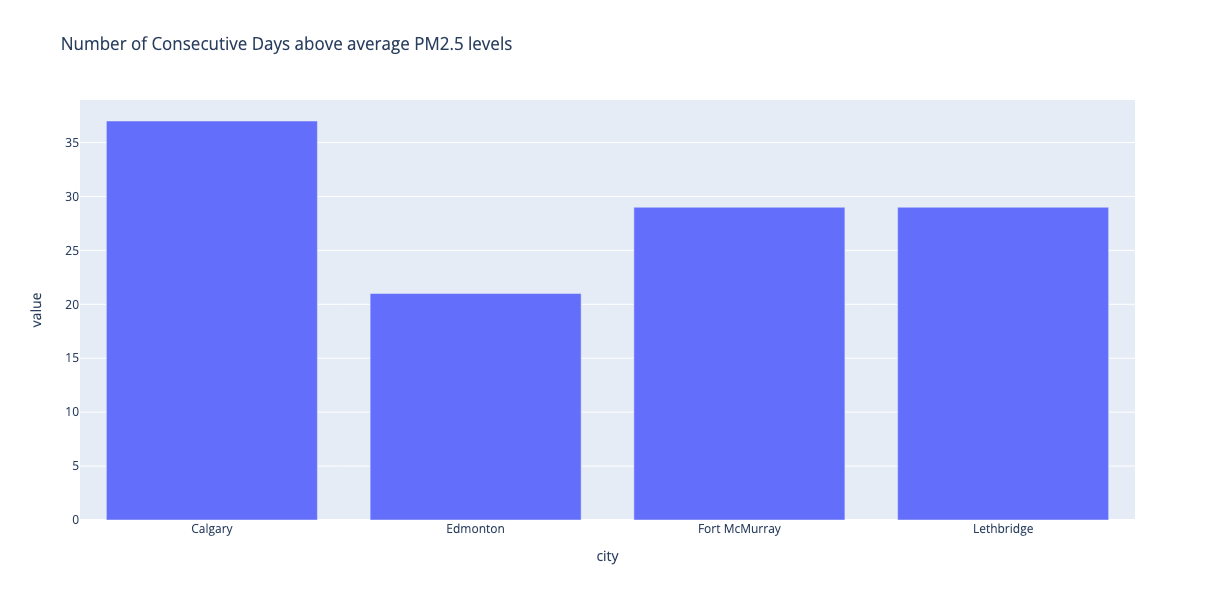

In [18]:
# Group by city and apply the function to calculate the longest streak for each city
longest_streaks_by_city = above_avg_df.groupby('city')['date'].apply(longest_streak)

# Display the results
fig = px.bar(longest_streaks_by_city, title="Number of Consecutive Days above average PM2.5 levels", width=800, height=600)
fig.update_layout(showlegend=False)

fig.show()  # Corrected to include parentheses
